In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def get_quasirandom_sequence(dim, num_samples):
    def phi(dd):
        x = 2.0000
        for iii in range(10):
            x = pow(1 + x, 1 / (dd + 1))
            return x

    d = dim  # Number of dimensions
    n = num_samples  # Number of design points

    g = phi(d)
    alpha = np.zeros(d)
    for j in range(d):
        alpha[j] = pow(1 / g, j + 1) % 1

    z = np.zeros((n, d))

    # This number can be any real number.
    # Common default setting is typically seed=0
    # But seed = 0.5 is generally better.
    seed = 0.5
    for i in range(len(z)):
        z[i] = (seed + alpha * (i + 1)) % 1

    return z

In [3]:
pairList = np.array([(8, 8192), (16, 4096), (32, 2048), (64, 1024), (128, 512), (256, 256),
                     (512, 128), (1024, 64), (2048, 32)])
paramLabels = np.array(["Reduced thickness", "Nucleon width"])
paramMins = np.array([0, 0.5])  # [param1_min, param2_min, ..., paramN_min]
paramMaxs = np.array([0.5, 1.2])  # [param1_max, param2_max, ..., paramN_max]
obsLabels = np.array([r"$\epsilon$2", r"$\epsilon$3"])
paramTruths = np.array([0.314, 0.618])
dataUncert = 65536
aa=1

In [4]:
unit_random_sequence = get_quasirandom_sequence(len(paramLabels), pairList[aa,0])
design_points = np.zeros(np.shape(unit_random_sequence))
observables = np.zeros((len(design_points), len(obsLabels[0])))

# For each design point, get an observable and store both the design point's
# coordinates in the parameter space and the observables' values
for ii in range(len(design_points)):
    for jj in range(len(paramLabels)):
        design_points[ii][jj] = paramMins[jj] + unit_random_sequence[ii][jj] * (paramMaxs[jj] - paramMins[jj])

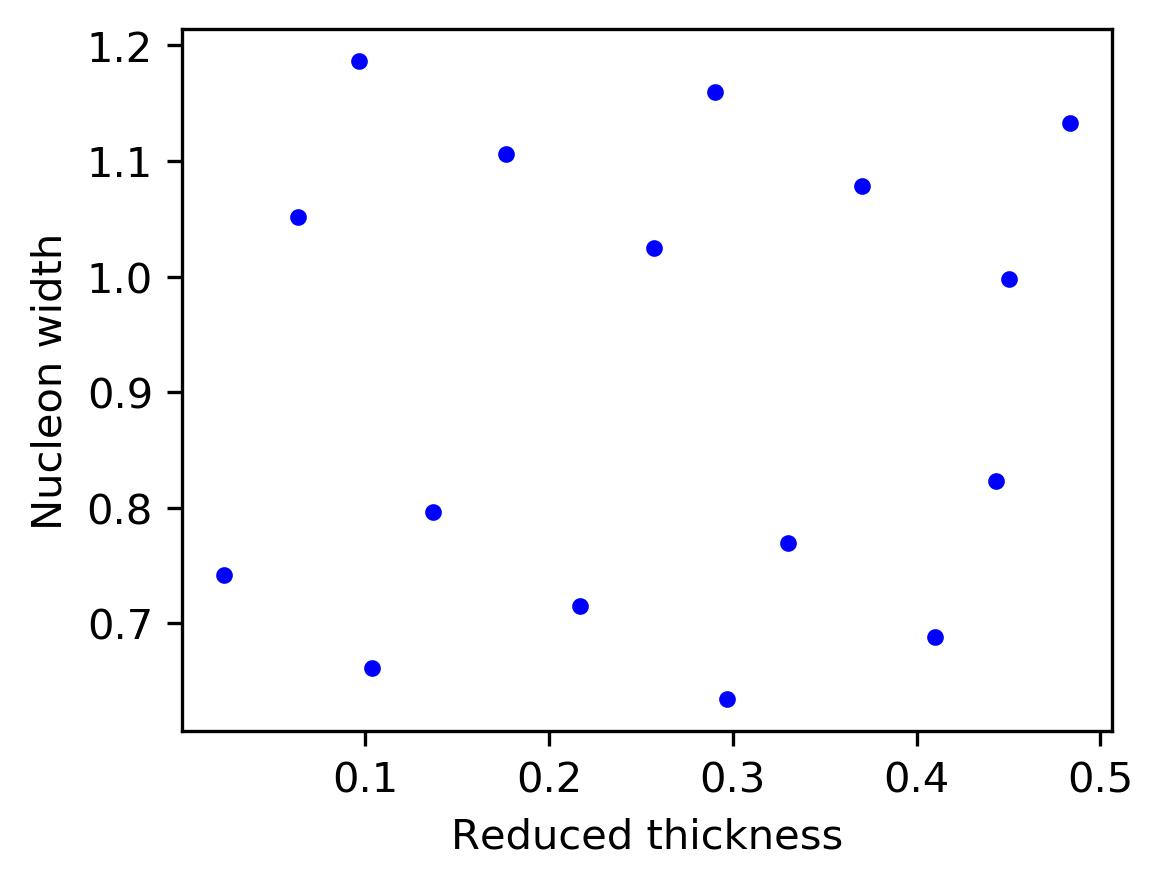

In [5]:
plt.figure(figsize=(4, 3.1), dpi=300)
plt.plot(design_points[:, 0], design_points[:, 1], 'b.')
plt.xlabel('Reduced thickness')
plt.ylabel('Nucleon width')
plt.savefig("./latticeplot.png")

In [36]:
def gaussian(mu, sigma):
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    return x, stats.norm.pdf(x, mu, sigma)

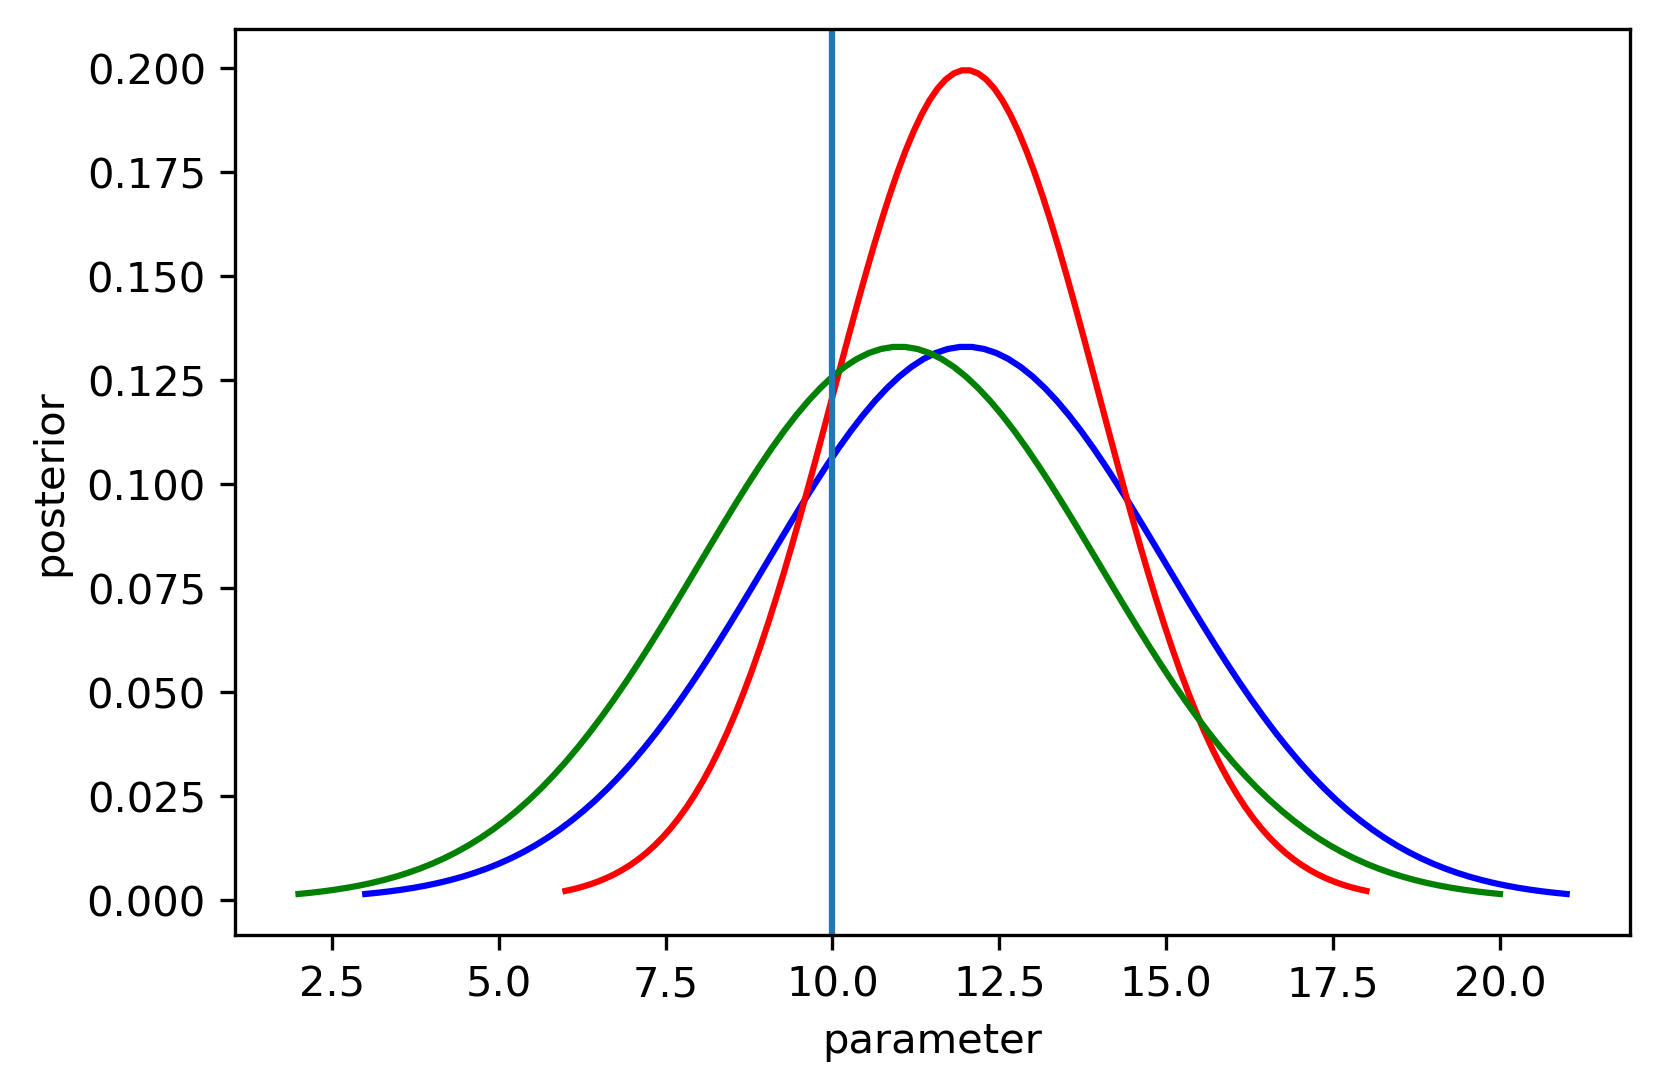

In [60]:
plt.figure(dpi = 300)
plt.plot(*gaussian(12, 3), 'b')
plt.plot(*gaussian(12, 2), 'r')
plt.plot(*gaussian(11, 3), 'g')
plt.axvline(10)
plt.xlabel('parameter')
plt.ylabel('posterior')
plt.savefig("./normpost.png")